In [1]:
# All the imports
import pandas as pd
import os as os
import math as m
import collections
from statistics import mean
from binarytree import Node

In [2]:
# Reading in and setting the duplicate dataframe variables
df = pd.read_csv('mutations.csv')
dfA,dfB,accDf,randomDF,bStrapdf = df,df,df,df, df #dataframe duplicate for mutation A &B, acc, rand

In [3]:
# This cell is the number of TPs, FPs, FNs, TNs for a mutation

# row Num is the total rows in the dataframe
def true_positives(rowNum, colnum, tempDF, tempBool):
    tp = 0
    tot_col = len(tempDF.columns)
    if (tempBool):
        if(colnum >= 0 and colnum < tot_col):
            for i in range (rowNum): 
                if((tempDF.index[i][0] == 'C') and (tempDF.iloc[i, colnum] == 1.0)):
                    tp+=1  
    else:
        if(colnum > 0 and colnum < tot_col):
            for i in range (rowNum): 
                if((tempDF.iloc[i,0][0] == 'C') and (tempDF.iloc[i, colnum] == 1.0)):
                    tp+=1      
    return tp

def false_positives(rowNum, colnum, tempDF, tempBool):
    fp = 0
    tot_col = len(tempDF.columns)
    if(tempBool):
        if(colnum >= 0 and colnum < tot_col):
            for i in range (rowNum): 
                if((tempDF.index[i][0] == 'N') and (tempDF.iloc[i, colnum] == 1.0)):
                    fp+=1  
    else:
        if(colnum > 0 and colnum < 1411):
            for i in range (rowNum): 
                if((tempDF.iloc[i,0][0] == 'N') and (tempDF.iloc[i, colnum] == 1.0)):
                    fp+=1
    return fp


def true_negatives(rowNum, colnum, tempDF, tempBool):
    tn = 0
    tot_col = len(tempDF.columns)
    if (tempBool):
        if(colnum >= 0 and colnum < tot_col):
            for i in range (rowNum): 
                if((tempDF.index[i][0] == 'N') and (tempDF.iloc[i, colnum] == 0.0)):
                    tn +=1  
    else:
        if(colnum > 0 and colnum < tot_col):
            for i in range (rowNum): 
                if((tempDF.iloc[i,0][0] == 'N') and (tempDF.iloc[i, colnum] == 0.0)):
                    tn +=1
    return tn

def false_negatives(rowNum, colnum, tempDF, tempBool):
    fn = 0
    tot_col = len(tempDF.columns)
    if (tempBool):
        if(colnum >= 0 and colnum < tot_col):
            for i in range (rowNum): 
                if((tempDF.index[i][0] == 'C') and (tempDF.iloc[i, colnum] == 0.0)):
                    fn+=1  
    else:
        if(colnum > 0 and colnum < tot_col):
            for i in range (rowNum): 
                if((tempDF.iloc[i,0][0] == 'C') and (tempDF.iloc[i, colnum] == 0.0)):
                    fn+=1
    return fn

In [4]:
#Classifier functions version one 
# gets the number of true positives when using the classifier
def classifier_TP(rowNum, tempDF, tempbt, tempBool):
    tp = 0
    if (tempBool):
        for i in range (rowNum): 
            if((tempDF.index[i][0] == 'C') and (num_classifier(tempDF.index[i], tempbt, tempBool) == 1.0)):
                tp+=1  
    else:
        for i in range (rowNum): 
            if((tempDF.iloc[i,0][0] == 'C') and (num_classifier(tempDF.iloc[i,0], tempbt, tempBool) == 1.0)):
                tp+=1      
    return tp

# Gets total true positives when using a model produced by phi
def phiclassifier_TP(temp_df, temp_bt, tempBool):
    tp = 0
    rowNum = len(temp_df.index)
    if(tempBool):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'C') and (phi_classifier(temp_df.index[i], temp_df, temp_bt, tempBool) == 1.0)):
                tp+=1  
    else:
        for i in range (rowNum):
            if((temp_df.iloc[i,0][0] == 'C') and (phi_classifier(temp_df.iloc[i,0], temp_df, temp_bt, tempBool) == 1.0)):
                tp+=1
    return tp

def fclassifier_TP(temp_df, forest, forestType, tempBool):
    tp = 0
    rowNum = len(temp_df.index)
    if(tempBool):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'C') and (forest_classifier(temp_df.index[i], temp_df, forest, forestType)[0] == 1.0)):
                tp+=1  
    else:
        for i in range (rowNum): 
            if((temp_df.iloc[i,0][0] == 'C') and (forest_classifier(temp_df.iloc[i,0], temp_df, forest, forestType)[0] == 1.0)):
                tp+=1  
    return tp
        

def classifier_FP(rowNum, tempDF, tempbt, tempBool):
    fp = 0
    if(tempBool):
        #if(colnum >= 0 and colnum < len(tempDF.columns)):
        for i in range (rowNum): 
            if((tempDF.index[i][0] == 'N') and (num_classifier(tempDF.index[i], tempbt, tempBool) == 1.0)):
                fp+=1  
    else:
        for i in range (rowNum): 
            if((tempDF.iloc[i,0][0] == 'N') and (num_classifier(tempDF.iloc[i,0], tempbt, tempBool) == 1.0)):
                fp+=1
    return fp

# Gets total false positives when using a model produced by phi
def phiclassifier_FP(temp_df, temp_bt, tempBool):
    fp = 0 
    rowNum = len(temp_df.index)
    if(tempBool):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'N') and (phi_clssifier(temp_df.index[i], temp_df, temp_bt, tempBool) == 1.0)):
                fp+=1  
    else:
        for i in range (rowNum):
            if((temp_df.iloc[i,0][0] == 'N') and (phi_classifier(temp_df.iloc[i,0], temp_df, temp_bt, tempBool) == 1.0)):
                fp+=1
    return fp

def fclassifier_FP(temp_df, forest, forestType, tempBool):
    fp = 0
    rowNum = len(temp_df.index)
    if(tempBool):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'N') and (forest_classifier(temp_df.index[i], temp_df, forest, forestType)[0] == 1.0)):
                fp+=1  
    else:
        for i in range (rowNum): 
            if((temp_df.iloc[i,0][0] == 'N') and (forest_classifier(temp_df.iloc[i,0], temp_df, forest, forestType)[0] == 1.0)):
                fp+=1  
    return fp

def classifier_TN(rowNum, tempDF, tempbt, tempBool):
    tn = 0
    if(tempBool):
        #if(colnum >= 0 and colnum < len(tempDF.columns)):
        for i in range (rowNum): 
            if((tempDF.index[i][0] == 'N') and (num_classifier(tempDF.index[i], tempbt, tempBool) == 0.0)):
                tn+=1  
    else:
        for i in range (rowNum): 
            if((tempDF.iloc[i,0][0] == 'N') and (num_classifier(tempDF.iloc[i,0], tempbt, tempBool) == 0.0)):
                tn+=1
    return tn

# Gets total true positives when using a model produced by phi
def phiclassifier_TN(temp_df, temp_bt, tempBool):
    tn = 0
    rowNum = len(temp_df.index)
    if(tempBool):
       # if(colnum >= 0 and colnum < len(tempDF.columns)):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'N') and (phi_classifier(temp_df.index[i], temp_df, temp_bt, tempBool) == 0.0)):
                tn+=1  
    else:
        for i in range (rowNum):
            if((temp_df.iloc[i,0][0] == 'N') and (phi_classifier(temp_df.iloc[i,0], temp_df, temp_bt, tempBool) == 0.0)):
                tn+=1
    return tn

def fclassifier_TN(temp_df, forest, forestType, tempBool):
    tn = 0
    rowNum = len(temp_df.index)
    if(tempBool):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'N') and (forest_classifier(temp_df.index[i], temp_df, forest, forestType)[0] == 0.0)):
                tn+=1  
    else:
        for i in range (rowNum): 
            if((temp_df.iloc[i,0][0] == 'N') and (forest_classifier(temp_df.iloc[i,0], temp_df, forest, forestType)[0] == 0.0)):
                tn+=1  
    return tn

def classifier_FN(rowNum, tempDF, tempbt, tempBool):
    fn = 0
    if(tempBool):
       # if(colnum >= 0 and colnum < len(tempDF.columns)):
            for i in range (rowNum): 
                if((tempDF.index[i][0] == 'C') and (num_classifier(tempDF.index[i], tempbt, tempBool) == 0.0)):
                    fn+=1  
    else:
        for i in range (rowNum): 
            if((tempDF.iloc[i,0][0] == 'C') and (num_classifier(tempDF.iloc[i,0], tempbt, tempBool) == 0.0)):
                fn+=1
    return fn

# Gets total true positives when using a model produced by phi
def phiclassifier_FN(temp_df, temp_bt, tempBool):
    fn = 0 
    rowNum = len(temp_df.index)
    if(tempBool):
        #if(colnum >= 0 and colnum < len(tempDF.columns)):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'C') and (phi_classifier(temp_df.index[i], temp_df, temp_bt, tempBool) == 0.0)):
                fn+=1  
    else:
        for i in range (rowNum):
            if((temp_df.iloc[i,0][0] == 'C') and (phi_classifier(temp_df.iloc[i,0], temp_df, temp_bt, tempBool) == 0.0)):
                fn+=1
    return fn

def fclassifier_FN(temp_df, forest, forestType, tempBool):
    fn = 0
    rowNum = len(temp_df.index)
    if(tempBool):
        for i in range (rowNum): 
            if((temp_df.index[i][0] == 'C') and (forest_classifier(temp_df.index[i], temp_df, forest, forestType)[0] == 0.0)):
                fn+=1  
    else:
        for i in range (rowNum): 
            if((temp_df.iloc[i,0][0] == 'C') and (forest_classifier(temp_df.iloc[i,0], temp_df, forest, forestType)[0] == 0.0)):
                fn+=1  
    return fn

In [5]:
# The TP-FP Functions
# One function to calculate TP-FP for each mutationm, one to 
# add the TP-FP row to the dataframe 

#helper function to get correct TP-FP value
def TPtakeFP(rowNum, tempDF, tempBool):
    if (tempBool):
        test_list = []
        rt = len(tempDF.index)
        for i in range (len(tempDF.columns)):
            test_list.append(true_positives(rt, i, tempDF, tempBool) - false_positives(rt, i, tempDF, tempBool))
        return test_list 
    else:
        for i in range (1411):
            if((i > 0)):
                tempDF.iloc[rowNum, i] = true_positives(rowNum, i, tempDF, tempBool) - false_positives(rowNum, i, tempDF, tempBool)
            else:
                continue 
            
# This code will add all TP - FP values to a dataframe 
def add_TPFP_df(row_total, tempDF, tempBool):
    if (tempBool):
        tlist = TPtakeFP(row_total, tempDF, tempBool)
        tempDF.loc['TP-FP'] = tlist
        return tempDF
    else: 
        tempDF = tempDF.append({tempDF.columns[0]:'TP-FP'}, ignore_index = True)
        TPtakeFP(row_total, tempDF, tempBool)
        return tempDF    

In [6]:
# These functions check if it is a TP, TN...
def is_truePos(rowNum, colNumber, tempDF):
    if(checkdf_Type(tempDF)):
        if((tempdf.index[0][0] == 'C') and (tempDF.iloc[rowNum, colNumber] == 1.0)):
            return True
        else:
            return False
    else:
        if((tempDF.iloc[rowNum,0][0] == 'C') and (tempDF.iloc[rowNum, colNumber] == 1.0)):
            return True 
        else:
            return False
def is_trueNeg(rowNum, colNumber, tempDF):
    if(checkdf_Type(tempDF)):
        if((tempdf.index[0][0] == 'N') and (tempDF.iloc[rowNum, colNumber] == 0.0)):
            return True
        else:
            return False
    else:
        if((tempDF.iloc[rowNum,0][0] == 'N') and (tempDF.iloc[rowNum, colNumber] == 0.0)):
            return True 
        else:
            return False

def is_falseNeg(rowNum, colNumber, tempDF):
    if(checkdf_Type(tempDF)):
        if((tempdf.index[0][0] == 'C') and (tempDF.iloc[rowNum, colNumber] == 0.0)):
            return True
        else:
            return False
    else:
        if((tempDF.iloc[rowNum,0][0] == 'C') and (tempDF.iloc[rowNum, colNumber] == 0.0)):
            return True 
        else:
            return False

def is_falsePos(rowNum, colNumber, tempDF):
    if(checkdf_Type(tempDF)):
        if((tempdf.index[0][0] == 'N') and (tempDF.iloc[rowNum, colNumber] == 1.0)):
            return True
        else:
            return False
    else:
        if((tempDF.iloc[rowNum,0][0] == 'N') and (tempDF.iloc[rowNum, colNumber] == 1.0)):
            return True 
        else:
            return False

In [7]:
# Function to search for a mutation index
def search_mutIndex(target, tempDF):
    #if(checkdf_Type(tempDF)):
       # return df.columns.get_loc(target)
        
   # else:
        return tempDF.columns.get_loc(target)

In [8]:
def eval(row_num, tempdf, temp_bt, classifierFunc, tempBool = False, forest = 'NaN', forestType = 'NaN'):
    temp_df = pd.DataFrame(index = ['Classifier'], columns = ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Miss Rate', 'False Discovery Rate','False Omission Rate'])
    
    if (classifierFunc == num_classifier):
        ctp = classifier_TP(row_num, tempdf, temp_bt, tempBool)
        ctn = classifier_TN(row_num, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_num, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_num, tempdf, temp_bt, tempBool)
    elif(classifierFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool)
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(classifierFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp =  fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn =  fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("eval could not find classifier")
        
        
    pop = ctp + ctn + cfp + cfn
    
    temp_df.iloc[0, 0] = ctp
    temp_df.iloc[0, 1] = ctn
    temp_df.iloc[0, 2] = cfp
    temp_df.iloc[0, 3] = cfn
    if((ctp + ctn) != 0):
        temp_df.iloc[0, 4] = (ctp + ctn)/(pop)
    if((ctp + cfn) != 0):
        temp_df.iloc[0,5] =  (ctp)/(ctp + cfn)
    if((ctn + cfp) != 0):
        temp_df.iloc[0,6] = (ctn)/(ctn + cfp)
    if((ctp + cfp) != 0):
        temp_df.iloc[0, 7] = (ctp) / (ctp + cfp)
    if((cfn + ctp) != 0):
        temp_df.iloc[0, 8] = (cfn) / (cfn + ctp)
    if((cfp + ctp) != 0):
        temp_df.iloc[0, 9] = (cfp)/(cfp + ctp)
    if((cfn + ctn) != 0):
        temp_df.iloc[0, 10] = (cfn)/(cfn + ctn)
    return temp_df

In [9]:
# function to get the average evaluation, this could have bugs!!!!! WARNING
def ave_eval(row_total, tempdf_one, tempdf_two, tempdf_three, temp_bt1, temp_bt2, temp_bt3, cFunc,  tempBool = False, forest = 'NaN', forestType = 'NaN'):
    av_df = pd.DataFrame(index = ['Classifier'], columns = ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Miss Rate', 'False Discovery Rate','False Omission Rate'])
    div = 3
    
    if (cFunc == num_classifier):
        ctp = ((classifier_TP(row_total, tempdf_one , temp_bt1, tempBool) + classifier_TP(row_total, tempdf_two , temp_bt2, tempBool) + classifier_TP(row_total, tempdf_three , temp_bt3, tempBool))/div)
        ctn = ((classifier_TN(row_total, tempdf_one , temp_bt1, tempBool) + classifier_TN(row_total, tempdf_two , temp_bt2, tempBool) + classifier_TN(row_total,tempdf_three , temp_bt3, tempBool))/div)
        cfp = ((classifier_FP(row_total, tempdf_one , temp_bt1, tempBool) + classifier_FP(row_total, tempdf_two , temp_bt2, tempBool) + classifier_FP(row_total,tempdf_three , temp_bt3, tempBool))/div)
        cfn = ((classifier_FN(row_total, tempdf_one , temp_bt1, tempBool) + classifier_FN(row_total, tempdf_two , temp_bt2, tempBool) + classifier_FN(row_total,tempdf_three , temp_bt3, tempBool))/div)
    elif(cFunc == phi_classifier):
        ctp = ((phiclassifier_TP(tempdf_one, temp_bt1, tempBool) + phiclassifier_TP(tempdf_two, temp_bt2, tempBool) + phiclassifier_TP(tempdf_three, temp_bt3, tempBool))/div)
        ctn = ((phiclassifier_TN(tempdf_one ,temp_bt1, tempBool) + phiclassifier_TN(tempdf_two, temp_bt2, tempBool) + phiclassifier_TN(tempdf_three, temp_bt3, tempBool))/div)
        cfp = ((phiclassifier_FP(tempdf_one, temp_bt1, tempBool) + phiclassifier_FP(tempdf_two, temp_bt2, tempBool) + phiclassifier_FP(tempdf_three, temp_bt3, tempBool))/div)
        cfn = ((phiclassifier_FN(tempdf_one, temp_bt1, tempBool) + phiclassifier_FN(tempdf_two, temp_bt2, tempBool) + phiclassifier_FN(tempdf_three, temp_bt3, tempBool))/div)
    elif(classifierFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("Ave_eval could not find classifier")
        
    av_df.iloc[0, 0] = ctp
    av_df.iloc[0, 1] = ctn
    av_df.iloc[0, 2] = cfp
    av_df.iloc[0, 3] = cfn
    av_df.iloc[0, 4] = ((accuracy(row_total, tempdf_one , temp_bt1, cFunc) + accuracy(row_total, tempdf_two , temp_bt2, cFunc) + accuracy(row_total,tempdf_three , temp_bt3, cFunc))/div)
    av_df.iloc[0,5] =  ((sensitivity(row_total, tempdf_one , temp_bt1, cFunc) + sensitivity(row_total, tempdf_two , temp_bt2, cFunc) + sensitivity(row_total,tempdf_three , temp_bt3, cFunc))/div)
    av_df.iloc[0,6] =  ((specificity(row_total, tempdf_one , temp_bt1, cFunc) + specificity(row_total, tempdf_two , temp_bt2, cFunc) + specificity(row_total,tempdf_three , temp_bt3, cFunc))/div)
    av_df.iloc[0, 7] = ((precision(row_total, tempdf_one , temp_bt1, cFunc) + precision(row_total, tempdf_two , temp_bt2, cFunc) + precision(row_total,tempdf_three , temp_bt3, cFunc))/div)
    av_df.iloc[0, 8] = ((miss_rate(row_total, tempdf_one , temp_bt1, cFunc) + miss_rate(row_total, tempdf_two , temp_bt2, cFunc) + miss_rate(row_total,tempdf_three , temp_bt3, cFunc))/div)
    av_df.iloc[0, 9] = ((falseDR(row_total, tempdf_one , temp_bt1, cFunc) + falseDR(row_total, tempdf_two , temp_bt2, cFunc) + falseDR(row_total,tempdf_three , temp_bt3, cFunc))/div)
    av_df.iloc[0, 10] =((falseOR(row_total, tempdf_one , temp_bt1, cFunc) + falseOR(row_total, tempdf_two , temp_bt2, cFunc) + falseOR(row_total,tempdf_three , temp_bt3, cFunc))/div)
    return av_df

In [10]:
# Initial Classifier Function
def classifier(tempInput, tempbt, tempBool):
    root_index, left_index, right_index = tempbt.value, tempbt.left.value, tempbt.right.value 
    found = False
    
    
    if(tempBool):
        for i in range(162):
            if (tempInput == df.index[i]):
                found = True
                print ("success")
                
                #classification
                if(df.iloc[i, root_index] == 1.0):
                    if(df.iloc[i, left_index] == 1.0):
                        return print ("The patient in A: ", tempInput, "is classifed as Cancer")   
                    else:
                        return print ("The patient in A: ", tempInput, "is classifed as Non Cancer")
                else: 
                    if (df.iloc[i, right_index] == 1.0):
                         return print ("The patient in B: ", tempInput, "is classifed as Cancer")
                    else:
                         return print ("The patient in B: ", tempInput, "is classifed as Non Cancer")
                        
    else:
        for i in range(162):
            if (tempInput == df.iloc[i,0]):
                found = True
                print ("success")

                #classification
                if(df.iloc[i, root_index] == 1.0):
                    if(df.iloc[i, left_index] == 1.0):
                        return print ("The patient in A: ", tempInput, "is classifed as Cancer")   
                    else:
                        return print ("The patient in A: ", tempInput, "is classifed as Non Cancer")
                else: 
                    if (df.iloc[i, right_index] == 1.0):
                         return print ("The patient in B: ", tempInput, "is classifed as Cancer")
                    else:
                         return print ("The patient in B: ", tempInput, "is classifed as Non Cancer")
    
    
    if (found == False):
        print("This is not a valid patient")
        return

In [11]:
#Initial classifier function, returns numbers instead
#may have to fix for new df
def num_classifier(tempInput, temp_bt, tempBool):
    #find the mutations that partition
    root_index, left_index, right_index = temp_bt.value, temp_bt.left.value, temp_bt.right.value 
    found = False
    
    if(tempBool):
        for i in range (162):
            if (tempInput == df.index[i]):
                found = True
                
                #classification
                if(df.iloc[i, root_index] == 1.0):
                    if(df.iloc[i, left_index] == 1.0):
                        return 1.0   
                    else:
                        return 0.0
                else: 
                    if (df.iloc[i, right_index] == 1.0):
                        return 1.0
                    else:
                         return 0.0
    else:
        # find the sample and when found classify it
        for i in range(162):  
            if(tempInput == df.iloc[i,0]):
                found = True
                
                #classification
                if(df.iloc[i, root_index] == 1.0):
                    if(df.iloc[i, left_index] == 1.0):
                        return 1.0   
                    else:
                        return 0.0
                else: 
                    if (df.iloc[i, right_index] == 1.0):
                        return 1.0
                    else:
                         return 0.0
                    
    if (found == False):
        return

In [12]:
#The speed problem has been fixed, This function splits a dataframe base on a mutation
# into groups A & B
def phi_splitDF(tempdf, mut_Index):
    root_L = tempdf[tempdf[tempdf.columns[mut_Index]] == 1]
    root_R = tempdf[tempdf[tempdf.columns[mut_Index]] == 0]    
    tlist = [root_L, root_R]
    return tlist

In [13]:
# This functions classifies based on phi
# May have to fix based on new df
def phi_classifier(tempInput, rootdf, temp_bt, tempBool):
    #find the mutations that partition
    root_index, left_index, right_index = temp_bt.value, temp_bt.left.value, temp_bt.right.value 
    tlist_Root = phi_splitDF(rootdf, root_index)
    root_L, root_R = tlist_Root[0], tlist_Root[1]
    
    tlist_A, tlist_B = phi_splitDF(root_L, left_index), phi_splitDF(root_R, right_index)
    
    found = False
    
    if(tempBool):
        for i in range(162):
            if (tempInput == df.index[i]):
                found = True 
                
                if(df.iloc[i, root_index] == 1.0):
                    if(df.iloc[i, left_index] == 1.0):
                        if((act_totalC(tlist_A[0])) > (act_totalNC(tlist_A[0]))):
                                return 1.0
                        else: 
                                return 0.0 
                    else:
                        if(((act_totalC(tlist_A[1])) > (act_totalNC(tlist_A[1])))):
                            return 1.0
                        else:
                            return 0.0   
                else:
                    if(df.iloc[i, right_index] == 1.0):
                        if((act_totalC(tlist_B[0])) > (act_totalNC(tlist_B[0]))):
                            return 1.0
                        else: 
                            return 0.0 
                    elif(((act_totalC(tlist_B[1])) > (act_totalNC(tlist_B[1])))): 
                        return 1.0
                    else:
                        return 0.0
    else:
        for i in range(162):
            # find the sample and when found classify it
            if (tempInput == df.iloc[i,0]):
                found = True
                #classification
            
                if(df.iloc[i, root_index] == 1.0):
                    if(df.iloc[i, left_index] == 1.0):
                        if((act_totalC(tlist_A[0])) > (act_totalNC(tlist_A[0]))):
                                return 1.0
                        else: 
                                return 0.0 
                    else:
                        if(((act_totalC(tlist_A[1])) > (act_totalNC(tlist_A[1])))):
                            return 1.0
                        else:
                            return 0.0   
                else:
                    if(df.iloc[i, right_index] == 1.0):
                        if((act_totalC(tlist_B[0])) > (act_totalNC(tlist_B[0]))):
                            return 1.0
                        else: 
                            return 0.0 
                    elif(((act_totalC(tlist_B[1])) > (act_totalNC(tlist_B[1])))): 
                        return 1.0
                    else:
                        return 0.0
                
    
    if (found == False):
        return

In [14]:
# Gets the phi mutation data
def phi_mutData(mutName, root_df):
    
    mut_Index = search_mutIndex(mutName, root_df)
    tlist = phi_splitDF(root_df, mut_Index)
    root_L, root_R = tlist[0], tlist[1]
    temp_df = pd.DataFrame(columns = ['Mutation','n-tL', 'n-tR', 'n-tL-C', 'n-tL-NC','n-tR-C','n-tR-NC', 'p-L', 'p-R', 'p-C-tl', 'p-NC-tl', 'p-C-tr', 'p-NC-tr','CompOne','Qcomp','Phi'])
    
    temp_df = temp_df.append({'Mutation': mutName}, ignore_index=True)
    temp_df.iloc[0,1] = num_samples(root_L)
    temp_df.iloc[0,2] = num_samples(root_R)
    temp_df.iloc[0,3] = act_totalC(root_L)
    temp_df.iloc[0,4] = act_totalNC(root_L)
    temp_df.iloc[0,5] = act_totalC(root_R)
    temp_df.iloc[0,6] = act_totalNC(root_R)
    temp_df.iloc[0,7] = prob_Sample(root_L, root_df)
    temp_df.iloc[0,8] = prob_Sample(root_R, root_df)
    temp_df.iloc[0,9] = prob_selectC(root_L)
    temp_df.iloc[0,10] = prob_selectNC(root_L)
    temp_df.iloc[0,11] = prob_selectC(root_R)
    temp_df.iloc[0,12] = prob_selectNC(root_R)
    temp_df.iloc[0,13] = compOne_phi(root_L, root_R, root_df)
    temp_df.iloc[0,14] = Qcomp_phi(root_L, root_R)
    temp_df.iloc[0,15] = phi_functionMut(root_L, root_R, root_df)
            
                           
    return temp_df

In [15]:
# Gets the top 10 phi mutation data
def tt_mutData_Phi(tt_ser, rootdf):
    temp_df = pd.DataFrame(columns = ['Mutation','n-tL', 'n-tR', 'n-tL-C', 'n-tL-NC','n-tR-C','n-tR-NC', 'p-L', 'p-R', 'p-C-tl', 'p-NC-tl', 'p-C-tr', 'p-NC-tr','CompOne','Qcomp','Phi'])
    for i in range (10):
        plug_df = phi_mutData(tt_ser.index[i], rootdf)
        temp_df = temp_df.append(plug_df,ignore_index=True)
    return temp_df

In [16]:
# Gets the Igain information for a mutation
def igain_mutData(mutName, root_df):
    mut_Index = search_mutIndex(mutName, root_df)
    tlist = phi_splitDF(root_df, mut_Index)
    root_L, root_R = tlist[0], tlist[1]
    temp_df = pd.DataFrame(columns = ['Mutation','n(tL)', 'n(tR)', 'n(tL,C)', 'n(tL,NC)','n(tR,C)','n(tR,NC)', 'pL', 'pR', 'H(s,t)', 'H(t)', 'gain(s)'])
    
    temp_df = temp_df.append({'Mutation': mutName}, ignore_index=True)
    temp_df.iloc[0,1] = num_samples(root_L)
    temp_df.iloc[0,2] = num_samples(root_R)
    temp_df.iloc[0,3] = act_totalC(root_L)
    temp_df.iloc[0,4] = act_totalNC(root_L)
    temp_df.iloc[0,5] = act_totalC(root_R)
    temp_df.iloc[0,6] = act_totalNC(root_R)
    temp_df.iloc[0,7] = prob_Sample(root_L, root_df)
    temp_df.iloc[0,8] = prob_Sample(root_R, root_df)
    temp_df.iloc[0,9] = split_ent(mutName, root_df)
    temp_df.iloc[0,10] = node_ent(root_df)
    temp_df.iloc[0,11] = i_gainMut(mutName, root_df)
          
    return temp_df

In [17]:
# Gets the top 10 Igain mutation data 
def tt_mutData_igain(tt_ser, rootdf):
    temp_df = pd.DataFrame(columns = ['Mutation','n(tL)', 'n(tR)', 'n(tL,C)', 'n(tL,NC)','n(tR,C)','n(tR,NC)', 'pL', 'pR', 'H(s,t)', 'H(t)', 'gain(s)'])
    for i in range (10):
        plug_df = igain_mutData(tt_ser.index[i], rootdf)
        temp_df = temp_df.append(plug_df,ignore_index=True)
    return temp_df

In [18]:
def accuracy(row_total, tempdf, temp_bt, cFunc, tempBool = False, forest = 'NaN', forestType = 'NaN'):
    if(cFunc == num_classifier):
        ctp = classifier_TP(row_total, tempdf, temp_bt, tempBool)        
        ctn = classifier_TN(row_total, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_total, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_total, tempdf, temp_bt, tempBool)
    elif(cFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool) 
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("accuracy could not find classifier")
        
    pop = ctp + ctn + cfp + cfn
    acc = (ctp + ctn)/(pop)
    return acc

In [19]:
def sensitivity(row_total, tempdf, temp_bt, cFunc, tempBool = False, forest = 'NaN', forestType = 'NaN'):
    sens = -1
    if(cFunc == num_classifier):
        ctp = classifier_TP(row_total, tempdf, temp_bt, tempBool)        
        ctn = classifier_TN(row_total, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_total, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_total, tempdf, temp_bt, tempBool)
    elif(cFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool) 
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("Sensitivity could not find classifier")
    
    if((ctp + cfn) != 0):
        sens = (ctp)/(ctp + cfn)  
    return sens

In [20]:
def specificity(row_total, tempdf, temp_bt, cFunc, tempBool = False, forest = 'NaN', forestType = 'NaN'):
    spec = -1
    if(cFunc == num_classifier):
        ctp = classifier_TP(row_total, tempdf, temp_bt, tempBool)        
        ctn = classifier_TN(row_total, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_total, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_total, tempdf, temp_bt, tempBool)
    elif(cFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool) 
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("could not find classifier")
    
    if((ctn + cfp) != 0):
        spec = (ctn)/(ctn + cfp)
    return spec

In [21]:
def precision(row_total, tempdf, temp_bt, cFunc,  tempBool = False, forest = 'NaN', forestType = 'NaN'):
    prec = -1
    if(cFunc == num_classifier):
        ctp = classifier_TP(row_total, tempdf, temp_bt, tempBool)        
        ctn = classifier_TN(row_total, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_total, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_total, tempdf, temp_bt, tempBool)
    elif(cFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool) 
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("could not find classifier")
    
    if((ctp + cfp) != 0):
        prec = (ctp) / (ctp + cfp)
    return prec

In [22]:
def miss_rate(row_total, tempdf, temp_bt, cFunc,  tempBool = False, forest = 'NaN', forestType = 'NaN'):
    mr = -1
    
    if(cFunc == num_classifier):
        ctp = classifier_TP(row_total, tempdf, temp_bt, tempBool)        
        ctn = classifier_TN(row_total, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_total, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_total, tempdf, temp_bt, tempBool)
    elif(cFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool) 
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("could not find classifier")
    
    if((cfn + ctp) != 0):
        mr = (cfn) / (cfn + ctp)
    return mr

In [23]:
def falseDR(row_total, tempdf, temp_bt, cFunc,  tempBool = False, forest = 'NaN', forestType = 'NaN'):
    dr = -1 
    
    if(cFunc == num_classifier):
        ctp = classifier_TP(row_total, tempdf, temp_bt, tempBool)        
        ctn = classifier_TN(row_total, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_total, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_total, tempdf, temp_bt, tempBool)
    elif(cFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool) 
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("could not find classifier")
    
    if((cfp + ctp) != 0):
        dr = (cfp)/(cfp + ctp)
    return dr

In [24]:
def falseOR(row_total, tempdf, temp_bt, cFunc, tempBool = False, forest = 'NaN', forestType = 'NaN'):
    fOR = -1
    
    if(cFunc == num_classifier):
        ctp = classifier_TP(row_total, tempdf, temp_bt, tempBool)        
        ctn = classifier_TN(row_total, tempdf, temp_bt, tempBool)
        cfp = classifier_FP(row_total, tempdf, temp_bt, tempBool)
        cfn = classifier_FN(row_total, tempdf, temp_bt, tempBool)
    elif(cFunc == phi_classifier):
        ctp = phiclassifier_TP(tempdf, temp_bt, tempBool)
        ctn = phiclassifier_TN(tempdf, temp_bt, tempBool)
        cfp = phiclassifier_FP(tempdf, temp_bt, tempBool) 
        cfn = phiclassifier_FN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        ctp = fclassifier_TP(tempdf, forest, forestType, tempBool)
        ctn = fclassifier_TN(tempdf, forest, forestType, tempBool)
        cfp = fclassifier_FP(tempdf, forest, forestType, tempBool)
        cfn = fclassifier_FN(tempdf, forest, forestType, tempBool)
    else:
        return print("could not find classifier")
    
    if((cfn + ctn) != 0):
        fOR = (cfn)/(cfn + ctn)
    return fOR

In [25]:
def make_tree(row_total, tempdf, tempBool):
    if (tempBool): 
        bstrap_tempdf = tempdf.sample(n = row_total, axis='index', replace= True)
        Outbag = tempdf[~tempdf.apply(tuple, 1).isin(bstrap_tempdf.apply(tuple,1))]
        df_splitA, df_splitB = bstrap_tempdf, bstrap_tempdf
        bstrap_tempdf = bstrap_tempdf.set_index(bstrap_tempdf.columns[0])
        bstrap_tempdf.index.names = [None]
        col_total = int(m.sqrt(len(tempdf.columns)))
        bstrap_tempdf = bootstrap_sample(bstrap_tempdf , col_total)
        
        
        # Check if the temp df has TP-FP row, if it does drop the row in the group DFs and update the  split total 
        if(bstrap_tempdf.index[((len(bstrap_tempdf.index)) - 1)] == 'TP-FP'):
            df_splitA = df_splitA.drop(((len(bstrap_tempdf.index)) - 1))
            df_splitB = df_splitB.drop(((len(bstrap_tempdf.index)) - 1))
            split_rtotal -= 1 #54 delete later
        else: # This else statement has not been properly tested might be buggy!!!! Warning
            bstrap_tempdf = add_TPFP_df(row_total ,bstrap_tempdf ,tempBool)
            row_total += 1
        #good
        
        # Get the top TP-FP values in the tempdf, we will need this to get they key mutations, create dataframe for split data df_split
        index_last = row_total - 1
        tempSer = bstrap_tempdf.iloc[index_last, 1:col_total].sort_values(ascending = False)
        data = [[tempSer.index[0], tempSer.iloc[0]], [tempSer.index[1], tempSer.iloc[1]], [tempSer.index[2], tempSer.iloc[2]], [tempSer.index[3], tempSer.iloc[3]], [tempSer.index[4], tempSer.iloc[4]], [tempSer.index[5], tempSer.iloc[5]],
        [tempSer.index[6], tempSer.iloc[6]], [tempSer.index[7], tempSer.iloc[7]], [tempSer.index[8], tempSer.iloc[8]], [tempSer.index[9], tempSer.iloc[9]]]
        tempTTR = pd.DataFrame(data, columns = ['Mutation', 'TP-FP'])
        root_name = tempSer.index[0] 
        tempMI = search_mutIndex(root_name, tempdf)
        
        
        df_splitA, df_splitB = df_splitA.set_index(df_splitA.columns[0]), df_splitB.set_index(df_splitB.columns[0])
        df_splitA.index.names = [None]
        df_splitB.index.names = [None]
        df_splitA, df_splitB = bootstrap_sample(df_splitA , col_total), bootstrap_sample(df_splitB , col_total)
        
        #adding TP-FP to the group dataframes
        df_splitA =  add_TPFP_df(len(df_splitA.index), df_splitA, tempBool)
        df_splitB =  add_TPFP_df(len(df_splitB.index), df_splitB, tempBool)
        
        # Get the series top 10 of both split dataframes, get the top 10 data
        tserA = df_splitA.iloc[(len(df_splitA.index) - 1), 1:col_total].sort_values(ascending = False)
        tserB = df_splitB.iloc[(len(df_splitB.index) - 1), 1:col_total].sort_values(ascending = False)
        tdataA = [[tserA.index[0], tserA.iloc[0]], [tserA.index[1], tserA.iloc[1]], [tserA.index[2], tserA.iloc[2]], [tserA.index[3], tserA.iloc[3]], [tserA.index[4], tserA.iloc[4]], [tserA.index[5], tserA.iloc[5]],
        [tserA.index[6], tserA.iloc[6]], [tserA.index[7], tserA.iloc[7]], [tserA.index[8], tserA.iloc[8]], [tserA.index[9], tserA.iloc[9]]]
        tdataB = [[tserB.index[0], tserB.iloc[0]], [tserB.index[1], tserB.iloc[1]], [tserB.index[2], tserB.iloc[2]], [tserB.index[3], tserB.iloc[3]], [tserB.index[4], tserB.iloc[4]], [tserB.index[5], tserB.iloc[5]],[tserB.index[6], tserB.iloc[6]], [tserB.index[7], tserB.iloc[7]], [tserB.index[8], tserB.iloc[8]], [tserB.index[9], tserB.iloc[9]]]
        
        # Create top 10 dataframes 
        tempTTA = pd.DataFrame(tdataA, columns = ['Mutation', 'TP-FP'])
        tempTTB = pd.DataFrame(tdataB, columns = ['Mutation', 'TP-FP'])
        
        
        root = Node(search_mutIndex(tempTTA.iloc[0,0], tempdf))
        root.left = Node(search_mutIndex(tempTTA.iloc[1,0], tempdf))
        root.right = Node(search_mutIndex(tempTTB.iloc[0,0], tempdf))
        root.left.left = Node(11)
        root.left.right = Node(12)
        root.right.left = Node(21)
        root.right.right = Node(22)
        root.left.left.left = Node(1)
        root.left.left.right = Node(0)
        root.left.right.left = Node(1)
        root.left.right.right = Node(0)
        root.right.left.left = Node(1)
        root.right.left.right = Node(0)
        root.right.right.left = Node(1)
        root.right.right.right = Node(0)
        temp_list = [tempTTR, tempTTA, tempTTB, df_splitA, df_splitB, root, tempSer, tserA, tserB, Outbag]
        return temp_list
    else:
        # Check if the temp df has TP-FP row, if it does drop the row in the group DFs and update the  split total 
        if(tempdf.iloc[((len(tempdf.index)) - 1), 0] == 'TP-FP'):
            df_splitA = df_splitA.drop(((len(tempdf.index)) - 1))
            df_splitB = df_splitB.drop(((len(tempdf.index)) - 1))
            split_rtotal -= 1 #54 delete later
        else: # This else statement has not been properly tested might be buggy!!!! Warning
            tempdf = add_TPFP_df(row_total, tempdf, False)
            row_total += 1
        
        
        # Get the top TP-FP values in the tempdf, we will need this to get they key mutations, create dataframe for split data df_split
        index_last = row_total - 1
        tempSer = tempdf.iloc[index_last, 1:1411].sort_values(ascending = False)
        data = [[tempSer.index[0], tempSer.iloc[0]], [tempSer.index[1], tempSer.iloc[1]], [tempSer.index[2], tempSer.iloc[2]], [tempSer.index[3], tempSer.iloc[3]], [tempSer.index[4], tempSer.iloc[4]], [tempSer.index[5], tempSer.iloc[5]],
        [tempSer.index[6], tempSer.iloc[6]], [tempSer.index[7], tempSer.iloc[7]], [tempSer.index[8], tempSer.iloc[8]], [tempSer.index[9], tempSer.iloc[9]]]
        tempTTR = pd.DataFrame(data, columns = ['Mutation', 'TP-FP'])
        root_name = tempSer.index[0] 
        tempMI = search_mutIndex(root_name, tempdf)
    
        tlist = phi_splitDF(tempdf, tempMI)
        df_splitA, df_splitB = tlist[0], tlist[1]
   
    
        #adding TP-FP to the group dataframes
        df_splitA =  add_TPFP_df(len(df_splitA.index), df_splitA, False)
        df_splitB =  add_TPFP_df(len(df_splitB.index), df_splitB, False)

        # Get the series top 10 of both split dataframes, get the top 10 data
        tserA = df_splitA.iloc[(len(df_splitA.index) - 1), 1:1411].sort_values(ascending = False)
        tserB = df_splitB.iloc[(len(df_splitB.index) - 1), 1:1411].sort_values(ascending = False)
        tdataA = [[tserA.index[0], tserA.iloc[0]], [tserA.index[1], tserA.iloc[1]], [tserA.index[2], tserA.iloc[2]], [tserA.index[3], tserA.iloc[3]], [tserA.index[4], tserA.iloc[4]], [tserA.index[5], tserA.iloc[5]],
        [tserA.index[6], tserA.iloc[6]], [tserA.index[7], tserA.iloc[7]], [tserA.index[8], tserA.iloc[8]], [tserA.index[9], tserA.iloc[9]]]
        tdataB = [[tserB.index[0], tserB.iloc[0]], [tserB.index[1], tserB.iloc[1]], [tserB.index[2], tserB.iloc[2]], [tserB.index[3], tserB.iloc[3]], [tserB.index[4], tserB.iloc[4]], [tserB.index[5], tserB.iloc[5]],[tserB.index[6], tserB.iloc[6]], [tserB.index[7], tserB.iloc[7]], [tserB.index[8], tserB.iloc[8]], [tserB.index[9], tserB.iloc[9]]]
    
        # Create top 10 dataframes 
        tempTTA = pd.DataFrame(tdataA, columns = ['Mutation', 'TP-FP'])
        tempTTB = pd.DataFrame(tdataB, columns = ['Mutation', 'TP-FP'])
    
        root = Node(search_mutIndex(tempTTA.iloc[0,0], tempdf))
        root.left = Node(search_mutIndex(tempTTA.iloc[1,0], tempdf))
        root.right = Node(search_mutIndex(tempTTB.iloc[0,0], tempdf))
        root.left.left = Node(11)
        root.left.right = Node(12)
        root.right.left = Node(21)
        root.right.right = Node(22)
        root.left.left.left = Node(1)
        root.left.left.right = Node(0)
        root.left.right.left = Node(1)
        root.left.right.right = Node(0)
        root.right.left.left = Node(1)
        root.right.left.right = Node(0)
        root.right.right.left = Node(1)
        root.right.right.right = Node(0)
        temp_list = [tempTTR, tempTTA, tempTTB, df_splitA, df_splitB, root, tempSer, tserA, tserB]
        return temp_list

In [26]:
def make_treePhi(row_total, rootdf, tempBool):
    if(tempBool):
        bstrap_tempdf = rootdf.sample(n = row_total, axis='index', replace= True)
        Outbag = rootdf[~rootdf.apply(tuple, 1).isin(bstrap_tempdf.apply(tuple,1))]
        root_L, root_R = bstrap_tempdf, bstrap_tempdf
        bstrap_tempdf = bstrap_tempdf.set_index(bstrap_tempdf.columns[0])
        bstrap_tempdf.index.names = [None]
        col_total = int(m.sqrt(len(rootdf.columns)))
        bstrap_tempdf = bootstrap_sample(bstrap_tempdf , col_total)
        
        # Check if the temp df has Phi row, if it does drop the row in the group DFs and update the  split total 
        if(bstrap_tempdf.index[((len(bstrap_tempdf.index)) - 1)] == 'Phi'):
            root_L = root_L.drop(((len(bstrap_tempdf.index)) - 1))
            root_R = root_R.drop(((len(bstrap_tempdf.index)) - 1))
            split_rtotal -= 1 #54 delete later
        else: # This else statement has not been properly tested might be buggy!!!! Warning
            bstrap_tempdf = add_phi_df(row_total ,bstrap_tempdf)
            row_total += 1
        #good
        
        
        # Get the top Phi values in the tempdf, we will need this to get they key mutations, create dataframe for split data df_split
        index_last = row_total - 1
        tempSer = bstrap_tempdf.iloc[index_last, 1:col_total].sort_values(ascending = False)
        data = [[tempSer.index[0], tempSer.iloc[0]], [tempSer.index[1], tempSer.iloc[1]], [tempSer.index[2], tempSer.iloc[2]], [tempSer.index[3], tempSer.iloc[3]], [tempSer.index[4], tempSer.iloc[4]], [tempSer.index[5], tempSer.iloc[5]],
        [tempSer.index[6], tempSer.iloc[6]], [tempSer.index[7], tempSer.iloc[7]], [tempSer.index[8], tempSer.iloc[8]], [tempSer.index[9], tempSer.iloc[9]]]
        tempTTR = pd.DataFrame(data, columns = ['Mutation', 'Phi'])
        root_name = tempSer.index[0] 
        tempMI = search_mutIndex(root_name, rootdf)
        
        root_L, root_R = root_L.set_index(root_L.columns[0]), root_R.set_index(root_R.columns[0])
        root_L.index.names = [None]
        root_R.index.names = [None]
        root_L, root_R= bootstrap_sample(root_L , col_total), bootstrap_sample(root_R , col_total)
        
        root_L =  add_phi_df(len(root_L.index), root_L)
        root_R =  add_phi_df(len(root_R.index), root_R)
        
        # Get the series top 10 of both split dataframes, get the top 10 data
        tserA = root_L.iloc[(len(root_L.index) - 1), 1:col_total].sort_values(ascending = False)
        tserB = root_R.iloc[(len(root_R.index) - 1), 1:col_total].sort_values(ascending = False)
        tdataA = [[tserA.index[0], tserA.iloc[0]], [tserA.index[1], tserA.iloc[1]], [tserA.index[2], tserA.iloc[2]], [tserA.index[3], tserA.iloc[3]], [tserA.index[4], tserA.iloc[4]], [tserA.index[5], tserA.iloc[5]],
        [tserA.index[6], tserA.iloc[6]], [tserA.index[7], tserA.iloc[7]], [tserA.index[8], tserA.iloc[8]], [tserA.index[9], tserA.iloc[9]]]
        tdataB = [[tserB.index[0], tserB.iloc[0]], [tserB.index[1], tserB.iloc[1]], [tserB.index[2], tserB.iloc[2]], [tserB.index[3], tserB.iloc[3]], [tserB.index[4], tserB.iloc[4]], [tserB.index[5], tserB.iloc[5]],[tserB.index[6], tserB.iloc[6]], [tserB.index[7], tserB.iloc[7]], [tserB.index[8], tserB.iloc[8]], [tserB.index[9], tserB.iloc[9]]]
        
        # Create top 10 dataframes 
        tempTTA = pd.DataFrame(tdataA, columns = ['Mutation', 'Phi'])
        tempTTB = pd.DataFrame(tdataB, columns = ['Mutation', 'Phi'])
        
        root = Node(search_mutIndex(tempTTA.iloc[0,0], rootdf))
        root.left = Node(search_mutIndex(tempTTA.iloc[1,0], rootdf))
        root.right = Node(search_mutIndex(tempTTB.iloc[0,0], rootdf))
        root.left.left = Node(11)
        root.left.right = Node(12)
        root.right.left = Node(21)
        root.right.right = Node(22)
        root.left.left.left = Node(1)
        root.left.left.right = Node(0)
        root.left.right.left = Node(1)
        root.left.right.right = Node(0)
        root.right.left.left = Node(1)
        root.right.left.right = Node(0)
        root.right.right.left = Node(1)
        root.right.right.right = Node(0)
        temp_list = [tempTTR, tempTTA, tempTTB, root_L, root_R, root, tempSer, tserA, tserB, Outbag]
        return temp_list
        
    else:
        # Check if the temp df has phi row, if it does drop the row in the group DFs and update the  split total 
        if(rootdf.iloc[((len(rootdf.index)) - 1), 0] == 'Phi'):
            root_L = root_L.drop(((len(rootdf.index)) - 1))
            root_R = root_R.drop(((len(rootdf.index)) - 1))
            split_rtotal -= 1 #54 delete later
        else: # This else statement has not been properly tested might be buggy!!!! Warning
            rootdf = add_phi_df(row_total, rootdf)
            row_total += 1
        
         # Get the top phi values in the rootdf, we will need this to get they key mutations
        index_last = row_total - 1
        tempSer = rootdf.iloc[index_last, 1:1411].sort_values(ascending = False)
        data = [[tempSer.index[0], tempSer.iloc[0]], [tempSer.index[1], tempSer.iloc[1]], [tempSer.index[2], tempSer.iloc[2]], [tempSer.index[3], tempSer.iloc[3]], [tempSer.index[4], tempSer.iloc[4]], [tempSer.index[5], tempSer.iloc[5]],
            [tempSer.index[6], tempSer.iloc[6]], [tempSer.index[7], tempSer.iloc[7]], [tempSer.index[8], tempSer.iloc[8]], [tempSer.index[9], tempSer.iloc[9]]]
        tempTTR = pd.DataFrame(data, columns = ['Mutation', 'Phi'])
    
        #Get the root phi name and feature index
        root_name = tempSer.index[0] 
        root_index = search_mutIndex(root_name, rootdf)
    
    
        tlist = phi_splitDF(rootdf, root_index)
        root_L, root_R = tlist[0], tlist[1]
    
        #adding phi to the group dataframes
        root_L =  add_phi_df(len(root_L.index), root_L)
        root_R =  add_phi_df(len(root_R.index), root_R)
    
    
        #Top 10 data of splits
        tserA = root_L.iloc[(len(root_L.index) - 1), 1:1411].sort_values(ascending = False)
        tserB = root_R.iloc[(len(root_R.index) - 1), 1:1411].sort_values(ascending = False)
        tdataA = [[tserA.index[0], tserA.iloc[0]], [tserA.index[1], tserA.iloc[1]], [tserA.index[2], tserA.iloc[2]], [tserA.index[3], tserA.iloc[3]], [tserA.index[4], tserA.iloc[4]], [tserA.index[5], tserA.iloc[5]],[tserA.index[6], tserA.iloc[6]], [tserA.index[7], tserA.iloc[7]], [tserA.index[8], tserA.iloc[8]], [tserA.index[9], tserA.iloc[9]]]
        tdataB = [[tserB.index[0], tserB.iloc[0]], [tserB.index[1], tserB.iloc[1]], [tserB.index[2], tserB.iloc[2]], [tserB.index[3], tserB.iloc[3]], [tserB.index[4], tserB.iloc[4]], [tserB.index[5], tserB.iloc[5]],[tserB.index[6], tserB.iloc[6]], [tserB.index[7], tserB.iloc[7]], [tserB.index[8], tserB.iloc[8]], [tserB.index[9], tserB.iloc[9]]]
   
    
        # Create top 10 dataframes 
        tempTTA=  pd.DataFrame(tdataA, columns = ['Mutation', 'Phi'])
        tempTTB = pd.DataFrame(tdataB, columns = ['Mutation', 'Phi']) 
    
        root = Node(search_mutIndex(tempTTR.iloc[0,0], rootdf))
        root.left = Node(search_mutIndex(tempTTA.iloc[0,0], rootdf))
        root.right = Node(search_mutIndex(tempTTB.iloc[0,0], rootdf))
        root.left.left = Node(11)
        root.left.right = Node(12)
        root.right.left = Node(21)
        root.right.right = Node(22)
        root.left.left.left = Node(1)
        root.left.left.right = Node(0)
        root.left.right.left = Node(1)
        root.left.right.right = Node(0)
        root.right.left.left = Node(1)
        root.right.left.right = Node(0)
        root.right.right.left = Node(1)
        root.right.right.right = Node(0)
    
        temp_list = [tempTTR, tempTTA, tempTTB, root_L, root_R, root, tempSer, tserA, tserB]
        return temp_list
    

In [27]:
def make_treeIgain(row_total, rootdf, tempBool):
    if(tempBool):
        bstrap_tempdf = rootdf.sample(n = row_total, axis='index', replace= True)
        Outbag = rootdf[~rootdf.apply(tuple, 1).isin(bstrap_tempdf.apply(tuple,1))]
        root_L, root_R = bstrap_tempdf, bstrap_tempdf
        
        bstrap_tempdf, root_L, root_R = rootdf, rootdf, rootdf
        bstrap_tempdf = bstrap_tempdf.set_index(bstrap_tempdf.columns[0])
        bstrap_tempdf.index.names = [None]
        col_total = int(m.sqrt(len(rootdf.columns)))
        bstrap_tempdf = bootstrap_sample(bstrap_tempdf , col_total)
        
        # Check if the temp df has Phi row, if it does drop the row in the group DFs and update the  split total 
        if(bstrap_tempdf.index[((len(bstrap_tempdf.index)) - 1)] == 'Igain'):
            root_L = root_L.drop(((len(bstrap_tempdf.index)) - 1))
            root_R = root_R.drop(((len(bstrap_tempdf.index)) - 1))
            split_rtotal -= 1 #54 delete later
        else: # This else statement has not been properly tested might be buggy!!!! Warning
            bstrap_tempdf = add_igain_df(bstrap_tempdf)
            row_total += 1
        #good
        
        #Get the top Phi values in the tempdf, we will need this to get they key mutations, create dataframe for split data df_split
        index_last = row_total - 1
        tempSer = bstrap_tempdf.iloc[index_last, 1:col_total].sort_values(ascending = False)
        data = [[tempSer.index[0], tempSer.iloc[0]], [tempSer.index[1], tempSer.iloc[1]], [tempSer.index[2], tempSer.iloc[2]], [tempSer.index[3], tempSer.iloc[3]], [tempSer.index[4], tempSer.iloc[4]], [tempSer.index[5], tempSer.iloc[5]],
        [tempSer.index[6], tempSer.iloc[6]], [tempSer.index[7], tempSer.iloc[7]], [tempSer.index[8], tempSer.iloc[8]], [tempSer.index[9], tempSer.iloc[9]]]
        tempTTR = pd.DataFrame(data, columns = ['Mutation', 'Igain'])
        root_name = tempSer.index[0] 
        tempMI = search_mutIndex(root_name, rootdf)
        
        
        root_L, root_R = root_L.set_index(root_L.columns[0]), root_R.set_index(root_R.columns[0])
        root_L.index.names = [None]
        root_R.index.names = [None]
        root_L, root_R= bootstrap_sample(root_L , col_total), bootstrap_sample(root_R , col_total)
        root_L =  add_igain_df( root_L)
        root_R =  add_igain_df( root_R)
        
        
        # Get the series top 10 of both split dataframes, get the top 10 data
        tserA = root_L.iloc[(len(root_L.index) - 1), 1:col_total].sort_values(ascending = False)
        tserB = root_R.iloc[(len(root_R.index) - 1), 1:col_total].sort_values(ascending = False)
        tdataA = [[tserA.index[0], tserA.iloc[0]], [tserA.index[1], tserA.iloc[1]], [tserA.index[2], tserA.iloc[2]], [tserA.index[3], tserA.iloc[3]], [tserA.index[4], tserA.iloc[4]], [tserA.index[5], tserA.iloc[5]],
        [tserA.index[6], tserA.iloc[6]], [tserA.index[7], tserA.iloc[7]], [tserA.index[8], tserA.iloc[8]], [tserA.index[9], tserA.iloc[9]]]
        tdataB = [[tserB.index[0], tserB.iloc[0]], [tserB.index[1], tserB.iloc[1]], [tserB.index[2], tserB.iloc[2]], [tserB.index[3], tserB.iloc[3]], [tserB.index[4], tserB.iloc[4]], [tserB.index[5], tserB.iloc[5]],[tserB.index[6], tserB.iloc[6]], [tserB.index[7], tserB.iloc[7]], [tserB.index[8], tserB.iloc[8]], [tserB.index[9], tserB.iloc[9]]]
        
        # Create top 10 dataframes 
        tempTTA = pd.DataFrame(tdataA, columns = ['Mutation', 'Igain'])
        tempTTB = pd.DataFrame(tdataB, columns = ['Mutation', 'Igain'])
        
        root = Node(search_mutIndex(tempTTA.iloc[0,0], rootdf))
        root.left = Node(search_mutIndex(tempTTA.iloc[1,0], rootdf))
        root.right = Node(search_mutIndex(tempTTB.iloc[0,0], rootdf))
        root.left.left = Node(11)
        root.left.right = Node(12)
        root.right.left = Node(21)
        root.right.right = Node(22)
        root.left.left.left = Node(1)
        root.left.left.right = Node(0)
        root.left.right.left = Node(1)
        root.left.right.right = Node(0)
        root.right.left.left = Node(1)
        root.right.left.right = Node(0)
        root.right.right.left = Node(1)
        root.right.right.right = Node(0)
        temp_list = [tempTTR, tempTTA, tempTTB, root_L, root_R, root, tempSer, tserA, tserB, Outbag]
        return temp_list
    else:
        # Check if the temp df has Igain row, if it does drop the row in the group DFs and update the  split total 
        if(rootdf.iloc[((len(rootdf.index)) - 1), 0] == 'Igain'):
            root_L = root_L.drop(((len(rootdf.index)) - 1))
            root_R = root_R.drop(((len(rootdf.index)) - 1))
            split_rtotal -= 1 #54 delete later
        else: 
            rootdf = add_igain_df(rootdf)
            row_total += 1
        
         # Get the top Igain values in the rootdf, we will need this to get they key mutations
        index_last = row_total - 1
        tempSer = rootdf.iloc[index_last, 1:1411].sort_values(ascending = False)
        data = [[tempSer.index[0], tempSer.iloc[0]], [tempSer.index[1], tempSer.iloc[1]], [tempSer.index[2], tempSer.iloc[2]], [tempSer.index[3], tempSer.iloc[3]], [tempSer.index[4], tempSer.iloc[4]], [tempSer.index[5], tempSer.iloc[5]],
            [tempSer.index[6], tempSer.iloc[6]], [tempSer.index[7], tempSer.iloc[7]], [tempSer.index[8], tempSer.iloc[8]], [tempSer.index[9], tempSer.iloc[9]]]
        tempTTR = pd.DataFrame(data, columns = ['Mutation', 'Igain'])
    
        # Get the root Igain name and feature index
        root_name = tempSer.index[0] 
        root_index = search_mutIndex(root_name, rootdf)

        tlist = phi_splitDF(rootdf, root_index)
        root_L, root_R = tlist[0], tlist[1]

         #adding Igain to the group dataframes
        root_L =  add_igain_df(root_L)
        root_R =  add_igain_df(root_R)

        #Top 10 data of splits
        tserA = root_L.iloc[(len(root_L.index) - 1), 1:1411].sort_values(ascending = False)
        tserB = root_R.iloc[(len(root_R.index) - 1), 1:1411].sort_values(ascending = False)
        tdataA = [[tserA.index[0], tserA.iloc[0]], [tserA.index[1], tserA.iloc[1]], [tserA.index[2], tserA.iloc[2]], [tserA.index[3], tserA.iloc[3]], [tserA.index[4], tserA.iloc[4]], [tserA.index[5], tserA.iloc[5]],[tserA.index[6], tserA.iloc[6]], [tserA.index[7], tserA.iloc[7]], [tserA.index[8], tserA.iloc[8]], [tserA.index[9], tserA.iloc[9]]]
        tdataB = [[tserB.index[0], tserB.iloc[0]], [tserB.index[1], tserB.iloc[1]], [tserB.index[2], tserB.iloc[2]], [tserB.index[3], tserB.iloc[3]], [tserB.index[4], tserB.iloc[4]], [tserB.index[5], tserB.iloc[5]],[tserB.index[6], tserB.iloc[6]], [tserB.index[7], tserB.iloc[7]], [tserB.index[8], tserB.iloc[8]], [tserB.index[9], tserB.iloc[9]]]

        # Create top 10 dataframes 
        tempTTA=  pd.DataFrame(tdataA, columns = ['Mutation', 'Igain'])
        tempTTB = pd.DataFrame(tdataB, columns = ['Mutation', 'Igain'])

        root = Node(root_index)
        root.left = Node(search_mutIndex(tempTTA.iloc[0,0], rootdf))
        root.right = Node(search_mutIndex(tempTTB.iloc[0,0], rootdf))
        root.left.left = Node(11)
        root.left.right = Node(12)
        root.right.left = Node(21)
        root.right.right = Node(22)
        root.left.left.left = Node(1)
        root.left.left.right = Node(0)
        root.left.right.left = Node(1)
        root.left.right.right = Node(0)
        root.right.left.left = Node(1)
        root.right.left.right = Node(0)
        root.right.right.left = Node(1)
        root.right.right.right = Node(0)

        temp_list = [tempTTR, tempTTA, tempTTB, root_L, root_R, root, tempSer, tserA, tserB]

        return temp_list

In [28]:
def num_samples(tempdf):
    return len((tempdf.index))

In [29]:
# The actual names of cancer samples in a dataframe
def act_totalC(tempdf):
    c_samp = 0
    if(checkdf_Type(tempdf)):
        for i in range (len(tempdf.index)):
            if((tempdf.index[i][0] == 'C')):
                c_samp += 1
    else:
        for i in range (len(tempdf.index)): 
            if((tempdf.iloc[i,0][0] == 'C')):
                c_samp += 1 
    return c_samp

In [30]:
# The actual names of NC samples in a dataframe
def act_totalNC(tempdf):
    nc_samp = 0
    if(checkdf_Type(tempdf)):
        for i in range (len(tempdf.index)):
            if((tempdf.index[i][0] == 'N')):
                nc_samp += 1
    else:
        for i in range (len(tempdf.index)): 
            if((tempdf.iloc[i,0][0] == 'N')):
                nc_samp += 1 
    return nc_samp

In [31]:
# is we use a specific mutation to count C samples this is it
def numC_samples(tempdf, mutIndex):
    c_samp = 0
    if(mutIndex > 0):
        for i in range (len(tempdf.index)): 
            if((tempdf.iloc[i,mutIndex] == 1.0)):
                c_samp += 1 
    return c_samp

In [32]:
# if we use a specfic mutation to count NC samples
def numNC_samples(tempdf, mutIndex):
    nc_samp = 0
    if(mutIndex > 0):
        for i in range (len(tempdf.index)): 
            if((tempdf.iloc[i,mutIndex] == 0.0)):
                nc_samp += 1
    return nc_samp

In [33]:
def prob_Sample(child_df, rootdf):
    return (num_samples(child_df) / num_samples(rootdf))

In [34]:
def prob_selectC(tempdf):
    prob = 0
    div = num_samples(tempdf)
    if (div != 0):
        prob = act_totalC(tempdf) / num_samples(tempdf) 
    return prob 

In [35]:
def prob_selectNC(tempdf):
    prob = 0
    div = num_samples(tempdf)
    if (div != 0):
        prob = act_totalNC(tempdf) / num_samples(tempdf)
    return prob 

In [36]:
# Phi function componets
def compOne_phi(leftdf, rightdf, rootdf):
    val = 2 * prob_Sample(leftdf, rootdf) * prob_Sample(rightdf, rootdf)
    return val

def Qcomp_phi(leftdf, rightdf):
    val = (abs((prob_selectC(leftdf)) - (prob_selectC(rightdf))) + abs((prob_selectNC(leftdf)) - (prob_selectNC(rightdf))))
    return val

#calculates phi function for one mutation
def phi_functionMut(leftdf, rightdf, rootdf):
    phi = (compOne_phi(leftdf, rightdf, rootdf) * Qcomp_phi(leftdf, rightdf))
    return phi

In [37]:
#calculates phi function for all the mutations, must have a phi value column
def phi_function(rowNum, root_df):
    if(checkdf_Type(root_df)):
        test_list = []
        for i in range (len(root_df.columns)):
            temp_list = phi_splitDF(root_df,i)
            test_list.append(phi_functionMut(temp_list[0], temp_list[1], root_df))
        return test_list 
    else:
        for i in range (1411):
            if(i > 0):
                temp_list = phi_splitDF(root_df,i)
                root_df.iloc[rowNum, i] = phi_functionMut(temp_list[0], temp_list[1], root_df)
            
            else:
                continue

In [38]:
def add_phi_df(row_total, rootdf):
    if(checkdf_Type(rootdf)):
        tlist = phi_function(row_total, rootdf)
        rootdf.loc['Phi'] = tlist
        return rootdf
    else:
        rootdf = rootdf.append({rootdf.columns[0]:'Phi'}, ignore_index = True)
        phi_function(row_total,rootdf)
    return rootdf

In [39]:
def checkdf_Type(tempdf):
    if (isinstance(tempdf.index[0], str)):
        if((tempdf.index[0][0] == 'C') or (tempdf.index[0][0] == 'N')):
            return True
        else:
            return False
    else:
        return False

In [40]:
# The entropy at a node t/samples function
def node_ent(tempdf):
    pct, pnct = prob_selectC(tempdf), prob_selectNC(tempdf)
    loga, logb = 0, 0
    
    if (pct > 0):
        loga = m.log2(pct)
    if (pnct > 0):
         logb = m.log2(pnct)
        
    return (-1 * ((pct*loga) + (pnct * logb)))

In [41]:
# The entropy of a candidate split at node t
def split_ent(mutName, rootdf):
    index = search_mutIndex(mutName, rootdf)
    tlist = phi_splitDF(rootdf, index)
    child_dfL, child_dfR = tlist[0], tlist[1]
    probL, probR = prob_Sample(child_dfL,rootdf), prob_Sample(child_dfR,rootdf)
    return ((probL*node_ent(child_dfL)) + (probR * node_ent(child_dfR)))

In [42]:
# Information gain function for a mutation
def i_gainMut(mutName, root_df):
    return (node_ent(root_df) - split_ent(mutName, root_df))

In [43]:
# Calculates information gain for all the mutations
def igain_function(root_df):
    if(checkdf_Type(root_df)):
        test_list = []
        for i in range (len(root_df.columns)):
            test_list.append(i_gainMut(root_df.columns[i], root_df))
        return test_list 
    else:
        rowNum = len(root_df.index) - 1
        for i in range (1411):
            if (i > 0):
                root_df.iloc[rowNum, i] = i_gainMut(root_df.columns[i], root_df)
            else:
                continue

In [44]:
def add_igain_df(rootdf):
    if(checkdf_Type(rootdf)):
        tlist = igain_function(rootdf)
        rootdf.loc['Igain'] = tlist
        return rootdf
    else:
        rootdf = rootdf.append({rootdf.columns[0]:'Igain'}, ignore_index = True)
        igain_function(rootdf)
        return rootdf

In [45]:
#confusion matrix for classifer, untested could be buggy
def cm_Mutation(row_total, mutIndex, tempdf, cFunc = 'Nan', tempBool = False, forest = 'Nan', forestType = 'NaN'):
    temp_cm = pd.DataFrame(index = ['Predicted C', 'Predicted NC'], columns = ['Actual C', 'Actual NC'])
    if(cFunc == phi_classifier):
        temp_cm.iloc[0,0] = phiclassifier_TP(tempdf, temp_bt, tempBool)
        temp_cm.iloc[1,0] = phiclassifier_FN(tempdf, temp_bt, tempBool)
        temp_cm.iloc[0,1] = phiclassifier_FP(tempdf, temp_bt, tempBool)
        temp_cm.iloc[1,1] = phiclassifier_TN(tempdf, temp_bt, tempBool)
    elif(cFunc == forest_classifier):
        temp_cm.iloc[0,0] = fclassifier_TP(tempdf, forest, forestType, tempBool)
        temp_cm.iloc[1,0] = fclassifier_FN(tempdf, forest, forestType, tempBool)
        temp_cm.iloc[0,1] = fclassifier_FP(tempdf, forest, forestType, tempBool)
        temp_cm.iloc[1,1] = fclassifier_TN(tempdf, forest, forestType, tempBool) 
    else:
        temp_cm.iloc[0,0] = true_positves(row_total, mutIndex, tempdf)
        temp_cm.iloc[1,0] = false_negatives(row_total, mutIndex, tempdf)
        temp_cm.iloc[0,1] = false_positives(row_total, mutIndex, tempdf)
        temp_cm.iloc[1,1] = true_negatives(row_total, mutIndex, tempdf)
    
    return temp_cm

In [46]:
def bootstrap_sample(tempdf, num_mut):
    tdf = tempdf.sample(n = num_mut, axis='columns', replace=False)
    return tdf

In [47]:
def rand_forest(temp_df, num_trees, split_func, tempBool):
    tlist, list_root, list_left, list_right, OB_list, OB_size = [], [], [], [], [], []
    for i in range (num_trees):
        tlist.append(split_func(len(temp_df.index), temp_df, tempBool))
        rootN, leftN, rightN = temp_df.columns[tlist[i][5].value], temp_df.columns[tlist[i][5].left.value],temp_df.columns[tlist[i][5].right.value]
        list_root.append(rootN)
        list_left.append(leftN)
        list_right.append(rightN)
        if (tempBool):
            OB_list.append(tlist[i][9])
            OB_size.append(len(tlist[i][9].index))
            
    ave_OB = mean(OB_size)
    occurencesRoot = collections.Counter(list_root)
    sortedRoot = sorted(occurencesRoot.items(), key=lambda pair: pair[1], reverse=True)
    occurencesLeftC = collections.Counter(list_left)
    sortedLeft = sorted(occurencesLeftC.items(), key=lambda pair: pair[1], reverse=True)
    occurencesRightC = collections.Counter(list_right)
    sortedRight = sorted(occurencesRightC.items(), key=lambda pair: pair[1], reverse=True)
    
    rlist = [tlist, list_root, list_left, list_right ,OB_list, OB_size, ave_OB,
             sortedRoot,
             sortedLeft, sortedRight]
    return rlist
    
    

In [48]:
def forest_classifyData(samples, rootdf, forest, forestType):
    for x in samples:
        class_result = forest_classifier(x, rootdf, forest, forestType)
        if(class_result[0] == 1):
            print("The classification result for: ", x, " was C ")
            print("The number of C trees was: ", class_result[1])
            print("The number of NC trees was: ", class_result[2])
        elif(class_result[0] == 0):
            print("The classification result for: ", x, " was NC ")
            print("The number of C trees was: ", class_result[1])
            print("The number of NC trees was: ", class_result[2])
        else:
            print("The classification result for: ", x, " was a tie/neither ")
            print("The number of C trees was: ", class_result[1])
            print("The number of NC trees was: ", class_result[2])

In [49]:
def forest_classifier(tempInput, rootdf, forest, forestType):
    cancer_vote, non_vote = 0, 0
    c_tree , nc_tree = [],[]
    if(forestType == make_treePhi or forestType == make_treeIgain ):
        for i in range (len(forest[0])):
            if(phi_classifier(tempInput, rootdf, forest[0][i][5], False) == 1):
                cancer_vote+=1
                c_tree.append(i)
            else:
                non_vote+=1
                nc_tree.append(i)
    else:
        for i in range (len(forest[0])):
            if(num_classifier(tempInput, forest[0][i][5], False) == 1):
                cancer_vote+=1
                c_tree.append(i)
            else:
                non_vote+=1
                nc_tree.append(i)
    if(cancer_vote > non_vote):
        list = [1.0, cancer_vote, non_vote]
        return list
    elif(cancer_vote < non_vote):
        list = [0.0, cancer_vote, non_vote]
        return list
    else:
        list = [-1.0, cancer_vote, non_vote]
        return list
            
    

In [50]:
randomDF = randomDF.sample(n=162, replace = False)

In [51]:
groupI_df = randomDF.iloc[:54]
groupJ_df = randomDF.iloc[54:108]
groupK_df = randomDF.iloc[108:162]

pd.set_option('display.max_rows', 162)
groupIJ_df = groupI_df.append(groupJ_df, ignore_index=True)
groupJK_df = groupJ_df.append(groupK_df, ignore_index=True)
groupKI_df = groupK_df.append(groupI_df, ignore_index=True)

In [52]:
bStrapdf

,Unnamed: 0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-Del_DEL_G-G--,QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--,NHLRC2_GRCh37_10:115662308-115662308_Frame-Shift-Del_DEL_A-A--,PDZD8_GRCh37_10:119042898-119042898_Frame-Shift-Del_DEL_T-T--,EBF3_GRCh37_10:131666125-131666125_Frame-Shift-Del_DEL_C-C--,MASTL_GRCh37_10:27459272-27459272_Frame-Shift-Del_DEL_A-A--,PTCHD3_GRCh37_10:27687763-27687763_Frame-Shift-Del_DEL_A-A--,PFKP_GRCh37_10:3151612-3151612_Silent_SNP_C-C-T,CREM_GRCh37_10:35456559-35456559_Intron_DEL_T-T--,...,PHF2_GRCh37_9:96422621-96422621_Missense-Mutation_SNP_A-A-G,PHF2_GRCh37_9:96422642-96422642_Missense-Mutation_SNP_C-C-A,USP51_GRCh37_X:55513209-55513209_3'UTR_DEL_T-T--,CDH23_GRCh37_10:73405660-73405660_Missense-Mutation_SNP_G-G-A,SLC26A11_GRCh37_17:78195370-78195370_Missense-Mutation_SNP_C-C-T,MME_GRCh37_3:154866382-154866382_Missense-Mutation_SNP_A-A-T_A-A-C,CADPS_GRCh37_3:62459960-62459960_Missense-Mutation_SNP_G-G-T,SCN4A_GRCh37_17:62049998-62049998_Silent_SNP_G-G-A,FPR2_GRCh37_19:52272624-52272624_Missense-Mutation_SNP_G-G-A,OLFM3_GRCh37_1:102302454-102302454_Missense-Mutation_SNP_A-A-C_A-A-G
0,C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NC3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NC4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NC5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NC6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NC7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
tdf = bStrapdf.sample(n = 162, axis='index', replace= True)
tdf
# code to sample the rows with replacement

,Unnamed: 0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-Del_DEL_G-G--,QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--,NHLRC2_GRCh37_10:115662308-115662308_Frame-Shift-Del_DEL_A-A--,PDZD8_GRCh37_10:119042898-119042898_Frame-Shift-Del_DEL_T-T--,EBF3_GRCh37_10:131666125-131666125_Frame-Shift-Del_DEL_C-C--,MASTL_GRCh37_10:27459272-27459272_Frame-Shift-Del_DEL_A-A--,PTCHD3_GRCh37_10:27687763-27687763_Frame-Shift-Del_DEL_A-A--,PFKP_GRCh37_10:3151612-3151612_Silent_SNP_C-C-T,CREM_GRCh37_10:35456559-35456559_Intron_DEL_T-T--,...,PHF2_GRCh37_9:96422621-96422621_Missense-Mutation_SNP_A-A-G,PHF2_GRCh37_9:96422642-96422642_Missense-Mutation_SNP_C-C-A,USP51_GRCh37_X:55513209-55513209_3'UTR_DEL_T-T--,CDH23_GRCh37_10:73405660-73405660_Missense-Mutation_SNP_G-G-A,SLC26A11_GRCh37_17:78195370-78195370_Missense-Mutation_SNP_C-C-T,MME_GRCh37_3:154866382-154866382_Missense-Mutation_SNP_A-A-T_A-A-C,CADPS_GRCh37_3:62459960-62459960_Missense-Mutation_SNP_G-G-T,SCN4A_GRCh37_17:62049998-62049998_Silent_SNP_G-G-A,FPR2_GRCh37_19:52272624-52272624_Missense-Mutation_SNP_G-G-A,OLFM3_GRCh37_1:102302454-102302454_Missense-Mutation_SNP_A-A-C_A-A-G
139,C44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,NC100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,C32,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,NC25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,C35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
136,NC95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,C19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,NC83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,C20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,C15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# get out of bag dataset 
S = bStrapdf[~bStrapdf.apply(tuple, 1).isin(tdf.apply(tuple,1))]
S

,Unnamed: 0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-Del_DEL_G-G--,QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--,NHLRC2_GRCh37_10:115662308-115662308_Frame-Shift-Del_DEL_A-A--,PDZD8_GRCh37_10:119042898-119042898_Frame-Shift-Del_DEL_T-T--,EBF3_GRCh37_10:131666125-131666125_Frame-Shift-Del_DEL_C-C--,MASTL_GRCh37_10:27459272-27459272_Frame-Shift-Del_DEL_A-A--,PTCHD3_GRCh37_10:27687763-27687763_Frame-Shift-Del_DEL_A-A--,PFKP_GRCh37_10:3151612-3151612_Silent_SNP_C-C-T,CREM_GRCh37_10:35456559-35456559_Intron_DEL_T-T--,...,PHF2_GRCh37_9:96422621-96422621_Missense-Mutation_SNP_A-A-G,PHF2_GRCh37_9:96422642-96422642_Missense-Mutation_SNP_C-C-A,USP51_GRCh37_X:55513209-55513209_3'UTR_DEL_T-T--,CDH23_GRCh37_10:73405660-73405660_Missense-Mutation_SNP_G-G-A,SLC26A11_GRCh37_17:78195370-78195370_Missense-Mutation_SNP_C-C-T,MME_GRCh37_3:154866382-154866382_Missense-Mutation_SNP_A-A-T_A-A-C,CADPS_GRCh37_3:62459960-62459960_Missense-Mutation_SNP_G-G-T,SCN4A_GRCh37_17:62049998-62049998_Silent_SNP_G-G-A,FPR2_GRCh37_19:52272624-52272624_Missense-Mutation_SNP_G-G-A,OLFM3_GRCh37_1:102302454-102302454_Missense-Mutation_SNP_A-A-C_A-A-G
5,NC3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NC5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NC6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NC7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,NC8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,NC18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,NC21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,NC22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
tlist = []
tlist.append(make_treePhi(162, bStrapdf, True))
tlist[0][1]
tlist.append(make_tree(162, bStrapdf, True))
tlist.append(make_treeIgain(162, bStrapdf, True))

In [56]:
tlist[0][1]

,Mutation,Phi
0,LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del...,0.182747
1,MRGBP_GRCh37_20:61431073-61431073_3'UTR_DEL_C-C--,0.099680
2,PXDN_GRCh37_2:1652960-1652960_Frame-Shift-Del_...,0.083067
3,TCEB3_GRCh37_1:24078404-24078404_Frame-Shift-D...,0.083067
4,MTG1_GRCh37_10:135211971-135211971_Frame-Shift...,0.066453
5,IGHV3-35_GRCh37_14:106845443-106845443_Silent_...,0.066453
6,INTS3_GRCh37_1:153701021-153701021_5'UTR_DEL_C...,0.066453
7,CUL5_GRCh37_11:107965658-107965658_Frame-Shift...,0.066453
8,WNT1_GRCh37_12:49374348-49374348_Frame-Shift-D...,0.049840
9,MARK2_GRCh37_11:63670157-63670157_Missense-Mut...,0.049840


In [57]:
elist = [1, 3, 5, 1 ,  4, 3 , 5,5, 7]

In [58]:
occurences = collections.Counter(elist)

In [59]:
occurences

Counter({1: 2, 3: 2, 5: 3, 4: 1, 7: 1})

In [60]:
sorted(occurences.items(), key=lambda pair: pair[1], reverse=True)

[(5, 3), (1, 2), (3, 2), (4, 1), (7, 1)]

In [61]:
forestOne = rand_forest(bStrapdf, 25, make_treeIgain, True)

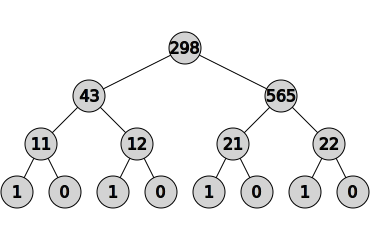

In [62]:
# to get the tree acccess returned list for the forest, list of trees, then the tree index
forestOne[0][9][5]

In [63]:
forestOne[1]

['THBD_GRCh37_20:23028480-23028480_Silent_SNP_G-G-A',
 'PRPF4B_GRCh37_6:4031881-4031881_Frame-Shift-Del_DEL_A-A--',
 'LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--',
 'SGK3_GRCh37_8:67716612-67716612_Frame-Shift-Del_DEL_A-A--',
 'PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G',
 'ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--',
 'PHF2_GRCh37_9:96422612-96422612_Frame-Shift-Del_DEL_A-A--',
 'TBX4_GRCh37_17:59560345-59560345_Frame-Shift-Del_DEL_C-C--',
 'OR5M3_GRCh37_11:56237709-56237709_Frame-Shift-Del_DEL_T-T--',
 "KDM1B_GRCh37_6:18222307-18222307_3'UTR_DEL_A-A--",
 'LHX1_GRCh37_17:35300395-35300395_Frame-Shift-Del_DEL_C-C--',
 "KDM1B_GRCh37_6:18222307-18222307_3'UTR_DEL_A-A--",
 'AKAP7_GRCh37_6:131481276-131481276_Frame-Shift-Del_DEL_A-A--',
 'RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--',
 "NFKBIA_GRCh37_14:35871169-35871169_3'UTR_DEL_T-T--",
 'UPF3A_GRCh37_13:115057211-115057211_Frame-Shift-Del_DEL_A-A--',
 'OR5M3_GRCh37_11:56237

In [64]:
forestOne[2]

['ZC3H18_GRCh37_16:88694459-88694459_Frame-Shift-Del_DEL_C-C--',
 "ANKH_GRCh37_5:14711209-14711209_3'UTR_DEL_A-A--",
 'KDM7A_GRCh37_7:139833448-139833448_Frame-Shift-Del_DEL_T-T--',
 'LARP7_GRCh37_4:113570754-113570754_Frame-Shift-Del_DEL_A-A--',
 "ZMPSTE24_GRCh37_1:40758422-40758422_3'UTR_DEL_T-T--",
 'LHX1_GRCh37_17:35300395-35300395_Frame-Shift-Del_DEL_C-C--',
 "DONSON_GRCh37_21:34947889-34947889_3'Flank_DEL_T-T--",
 'MAP9_GRCh37_4:156273869-156273869_Frame-Shift-Del_DEL_T-T--',
 'AKAP7_GRCh37_6:131481276-131481276_Frame-Shift-Del_DEL_A-A--',
 'KLHL14_GRCh37_18:30349862-30349862_Frame-Shift-Del_DEL_G-G--',
 'NFASC_GRCh37_1:204924033-204924033_Frame-Shift-Del_DEL_C-C--',
 'TVP23C_GRCh37_17:15441469-15441469_Intron_SNP_C-C-T',
 'FHOD3_GRCh37_18:34205516-34205516_Frame-Shift-Del_DEL_C-C--',
 "DONSON_GRCh37_21:34947889-34947889_3'Flank_DEL_T-T--",
 "SLCO3A1_GRCh37_15:92706441-92706441_3'UTR_DEL_A-A--",
 'KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T',
 'CCDC73_GRCh37_11:3

In [65]:
forestOne[3]

['LHX1_GRCh37_17:35300395-35300395_Frame-Shift-Del_DEL_C-C--',
 'ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--',
 'MVK_GRCh37_12:110019240-110019240_Frame-Shift-Del_DEL_C-C--',
 'PRPF4B_GRCh37_6:4031881-4031881_Frame-Shift-Del_DEL_A-A--',
 'C11orf35_GRCh37_11:558069-558069_RNA_DEL_G-G--',
 "DONSON_GRCh37_21:34947889-34947889_3'Flank_DEL_T-T--",
 'SP140_GRCh37_2:231159025-231159025_Frame-Shift-Del_DEL_A-A--',
 'CCDC73_GRCh37_11:32637520-32637520_Frame-Shift-Del_DEL_T-T--',
 'UBR5_GRCh37_8:103289349-103289349_Frame-Shift-Del_DEL_T-T--',
 'XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-Del_DEL_C-C--',
 'ZNF330_GRCh37_4:142143532-142143532_Frame-Shift-Del_DEL_A-A--',
 'LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--',
 'C9orf131_GRCh37_9:35043650-35043650_Frame-Shift-Del_DEL_C-C--',
 'GNG12_GRCh37_1:68171151-68171151_Frame-Shift-Del_DEL_T-T--',
 'ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--',
 'DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-

In [66]:
# out of bag datasets 
forestOne[4][3]

,Unnamed: 0,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-Del_DEL_G-G--,QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--,NHLRC2_GRCh37_10:115662308-115662308_Frame-Shift-Del_DEL_A-A--,PDZD8_GRCh37_10:119042898-119042898_Frame-Shift-Del_DEL_T-T--,EBF3_GRCh37_10:131666125-131666125_Frame-Shift-Del_DEL_C-C--,MASTL_GRCh37_10:27459272-27459272_Frame-Shift-Del_DEL_A-A--,PTCHD3_GRCh37_10:27687763-27687763_Frame-Shift-Del_DEL_A-A--,PFKP_GRCh37_10:3151612-3151612_Silent_SNP_C-C-T,CREM_GRCh37_10:35456559-35456559_Intron_DEL_T-T--,...,PHF2_GRCh37_9:96422621-96422621_Missense-Mutation_SNP_A-A-G,PHF2_GRCh37_9:96422642-96422642_Missense-Mutation_SNP_C-C-A,USP51_GRCh37_X:55513209-55513209_3'UTR_DEL_T-T--,CDH23_GRCh37_10:73405660-73405660_Missense-Mutation_SNP_G-G-A,SLC26A11_GRCh37_17:78195370-78195370_Missense-Mutation_SNP_C-C-T,MME_GRCh37_3:154866382-154866382_Missense-Mutation_SNP_A-A-T_A-A-C,CADPS_GRCh37_3:62459960-62459960_Missense-Mutation_SNP_G-G-T,SCN4A_GRCh37_17:62049998-62049998_Silent_SNP_G-G-A,FPR2_GRCh37_19:52272624-52272624_Missense-Mutation_SNP_G-G-A,OLFM3_GRCh37_1:102302454-102302454_Missense-Mutation_SNP_A-A-C_A-A-G
1,C2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NC3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NC6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,C4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,NC10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,NC12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,NC16,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,NC18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,NC21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# sizes of all th eout of bag datasets
forestOne[5]

[64,
 64,
 64,
 57,
 67,
 60,
 55,
 54,
 56,
 53,
 65,
 56,
 61,
 56,
 64,
 57,
 57,
 57,
 67,
 60,
 62,
 57,
 67,
 61,
 55]

In [68]:
forestOne[6]

59.84

In [69]:
forestOne[7]

[('ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--', 2),
 ('OR5M3_GRCh37_11:56237709-56237709_Frame-Shift-Del_DEL_T-T--', 2),
 ("KDM1B_GRCh37_6:18222307-18222307_3'UTR_DEL_A-A--", 2),
 ("NFKBIA_GRCh37_14:35871169-35871169_3'UTR_DEL_T-T--", 2),
 ('THBD_GRCh37_20:23028480-23028480_Silent_SNP_G-G-A', 1),
 ('PRPF4B_GRCh37_6:4031881-4031881_Frame-Shift-Del_DEL_A-A--', 1),
 ('LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--', 1),
 ('SGK3_GRCh37_8:67716612-67716612_Frame-Shift-Del_DEL_A-A--', 1),
 ('PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G', 1),
 ('PHF2_GRCh37_9:96422612-96422612_Frame-Shift-Del_DEL_A-A--', 1),
 ('TBX4_GRCh37_17:59560345-59560345_Frame-Shift-Del_DEL_C-C--', 1),
 ('LHX1_GRCh37_17:35300395-35300395_Frame-Shift-Del_DEL_C-C--', 1),
 ('AKAP7_GRCh37_6:131481276-131481276_Frame-Shift-Del_DEL_A-A--', 1),
 ('RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--', 1),
 ('UPF3A_GRCh37_13:115057211-115057211_Frame-Shift-Del_DEL_A-A--', 1),
 

In [70]:
forestOne[8]

[("DONSON_GRCh37_21:34947889-34947889_3'Flank_DEL_T-T--", 2),
 ('ZC3H18_GRCh37_16:88694459-88694459_Frame-Shift-Del_DEL_C-C--', 1),
 ("ANKH_GRCh37_5:14711209-14711209_3'UTR_DEL_A-A--", 1),
 ('KDM7A_GRCh37_7:139833448-139833448_Frame-Shift-Del_DEL_T-T--', 1),
 ('LARP7_GRCh37_4:113570754-113570754_Frame-Shift-Del_DEL_A-A--', 1),
 ("ZMPSTE24_GRCh37_1:40758422-40758422_3'UTR_DEL_T-T--", 1),
 ('LHX1_GRCh37_17:35300395-35300395_Frame-Shift-Del_DEL_C-C--', 1),
 ('MAP9_GRCh37_4:156273869-156273869_Frame-Shift-Del_DEL_T-T--', 1),
 ('AKAP7_GRCh37_6:131481276-131481276_Frame-Shift-Del_DEL_A-A--', 1),
 ('KLHL14_GRCh37_18:30349862-30349862_Frame-Shift-Del_DEL_G-G--', 1),
 ('NFASC_GRCh37_1:204924033-204924033_Frame-Shift-Del_DEL_C-C--', 1),
 ('TVP23C_GRCh37_17:15441469-15441469_Intron_SNP_C-C-T', 1),
 ('FHOD3_GRCh37_18:34205516-34205516_Frame-Shift-Del_DEL_C-C--', 1),
 ("SLCO3A1_GRCh37_15:92706441-92706441_3'UTR_DEL_A-A--", 1),
 ('KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T', 1),
 (

In [71]:
forestOne[9]

[('ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--', 2),
 ('DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--', 2),
 ('LHX1_GRCh37_17:35300395-35300395_Frame-Shift-Del_DEL_C-C--', 1),
 ('MVK_GRCh37_12:110019240-110019240_Frame-Shift-Del_DEL_C-C--', 1),
 ('PRPF4B_GRCh37_6:4031881-4031881_Frame-Shift-Del_DEL_A-A--', 1),
 ('C11orf35_GRCh37_11:558069-558069_RNA_DEL_G-G--', 1),
 ("DONSON_GRCh37_21:34947889-34947889_3'Flank_DEL_T-T--", 1),
 ('SP140_GRCh37_2:231159025-231159025_Frame-Shift-Del_DEL_A-A--', 1),
 ('CCDC73_GRCh37_11:32637520-32637520_Frame-Shift-Del_DEL_T-T--', 1),
 ('UBR5_GRCh37_8:103289349-103289349_Frame-Shift-Del_DEL_T-T--', 1),
 ('XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-Del_DEL_C-C--', 1),
 ('ZNF330_GRCh37_4:142143532-142143532_Frame-Shift-Del_DEL_A-A--', 1),
 ('LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--', 1),
 ('C9orf131_GRCh37_9:35043650-35043650_Frame-Shift-Del_DEL_C-C--', 1),
 ('GNG12_GRCh37_1:68171151-68171151_Frame-Shift-Del_D

In [72]:
sampleList = ['C1','C10', 'C100', 'NC5', 'NC15']
forest_classifyData(sampleList, bStrapdf, forestOne, make_treeIgain)

The classification result for:  C1  was NC 
The number of C trees was:  0
The number of NC trees was:  25
The classification result for:  C10  was NC 
The number of C trees was:  6
The number of NC trees was:  19
The classification result for:  C100  was NC 
The number of C trees was:  0
The number of NC trees was:  25
The classification result for:  NC5  was NC 
The number of C trees was:  0
The number of NC trees was:  25
The classification result for:  NC15  was NC 
The number of C trees was:  0
The number of NC trees was:  25


In [73]:
evalOne =  eval(162, forestOne[4][0], forestOne[0][9][5], forest_classifier, False, forestOne, make_treeIgain)

In [74]:
evalOne

,TP,TN,FP,FN,Accuracy,Sensitivity,Specificity,Precision,Miss Rate,False Discovery Rate,False Omission Rate
Classifier,3,43,0,18,0.71875,0.142857,1.0,1.0,0.857143,0.0,0.295082
